In [3]:
import pickle
file = open('feature','rb')
X_train = pickle.load(file)
file.close()

In [4]:
file = open('label','rb')
Y_train = pickle.load(file)
file.close()

In [60]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, LeakyReLU, Dropout

In [133]:
model = Sequential([
    Conv2D(64, (3,3), activation='relu', padding='same',input_shape=(48,48,1)),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation='relu',padding='same'),
    MaxPooling2D((2,2)),
    
    Conv2D(50, (3,3), activation='relu',padding='same'),
    Conv2D(50, (3,3), activation='relu',padding='same'),
    Conv2D(50, (3,3), activation='relu',padding='same'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(512, activation=LeakyReLU(alpha=0.01)),
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.2),
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.2),
    Dense(48, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.2),
    Dense(24, activation='relu'),
    Dense(12, activation='relu'),
    Dense(6, activation='softmax')
])

In [134]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [141]:
model.fit(X_train,Y_train,epochs=6,batch_size=32)

Epoch 1/6
563/563 [==============================] - 73s 129ms/step - loss: 0.4361 - accuracy: 0.8478
Epoch 2/6
563/563 [==============================] - 74s 131ms/step - loss: 0.4213 - accuracy: 0.8524
Epoch 3/6
563/563 [==============================] - 74s 132ms/step - loss: 0.3877 - accuracy: 0.8662
Epoch 4/6
563/563 [==============================] - 74s 132ms/step - loss: 0.3393 - accuracy: 0.8831
Epoch 5/6
563/563 [==============================] - 74s 131ms/step - loss: 0.3158 - accuracy: 0.8969
Epoch 6/6
563/563 [==============================] - 74s 132ms/step - loss: 0.3275 - accuracy: 0.8898


In [29]:
X = open('test_feature','rb')
X_test = pickle.load(X)
X.close()

Y = open('test_label','rb')
Y_test = pickle.load(Y)
Y.close()

In [142]:
model.evaluate(X_test,Y_test)

218/218 [==============================] - 7s 33ms/step - loss: 3.2652 - accuracy: 0.4850


[3.2651898860931396, 0.48497483134269714]

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [143]:
def predict(img):
    img = cv2.imread(img)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(48,48))
    print(img.shape)
    result = model.predict(img.reshape(-1,48,48,1))
    print(result)
    plt.imshow(img,'gray')

(48, 48)
1/1 [==============================] - 0s 90ms/step
[[9.6332580e-03 2.7983175e-03 1.0589624e-02 7.3190069e-01 2.4502373e-01
  5.4332893e-05]]


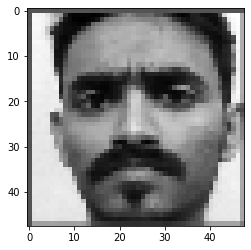

In [144]:
predict('detected.jpg')

In [145]:
from tensorflow.keras.models import save_model
save_model(model,"model.h5")